In [1]:
# Own MovieLens experiments
import os
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

RANDOM = 2021

In [2]:
datasets = {
    'ml-100k': '/home/weiss/rs_data/ml-100k/',
    'ml-latest-small': '/home/weiss/rs_data/ml-latest-small/',
    'ml-latest': '/home/weiss/rs_data/ml-latest/'
}

print('Available datasets: ', [key for key in datasets])
#dt = input('Dataset name = ')
#dt='ml-latest-small'
dt='ml-100k'

print('You selected {}'.format(dt))

Available datasets:  ['ml-100k', 'ml-latest-small', 'ml-latest']
You selected ml-100k


In [3]:
# Check structure
def list_files(startpath):
    print(startpath)
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))
dirs = [x[0] for x in os.walk(datasets[dt])]
ml = filter(lambda dirName: dirName if ('ml' in dirName) else '', list(dirs))
dt_dir_name= list(ml)[0]
print(list_files(dt_dir_name))

/home/weiss/rs_data/ml-100k/
/
    README
    u2.test
    u4.test
    u2.base
    allbut.pl
    u3.base
    u.data
    u.occupation
    ua.test
    u5.base
    u.genre
    u3.test
    ub.test
    mku.sh
    u.user
    u1.test
    ua.base
    u1.base
    u.item
    u5.test
    ub.base
    u4.base
    ml-100k.pkl
    u.info
processed/
    rX_val.csv
    rX_test_ns.csv
    rX_test.csv
    rX_train.csv
    rX_val_ns.csv
    rX_train_ns.csv
None


In [4]:
# read data from CSV
rX_train = pd.read_csv(dt_dir_name + 'processed/' + 'rX_train.csv', names=['userId', 'movieId', 'rating'])
rX_test = pd.read_csv(dt_dir_name + 'processed/' + 'rX_test.csv', names=['userId', 'movieId', 'rating'])
rX_val = pd.read_csv(dt_dir_name + 'processed/' + 'rX_val.csv', names=['userId', 'movieId', 'rating'])


rX_train['userId'] = 'u' + rX_train['userId'].astype(str)
rX_train['movieId'] = 'i' + rX_train['movieId'].astype(str)
rX_train.head()

,userId,movieId,rating
0,u269,i401,3
1,u90,i497,5
2,u925,i447,4
3,u450,i832,2
4,u901,i88,5


In [7]:
#Create a graph
G = nx.Graph()
 
#Add nodes
G.add_nodes_from(rX_train.userId, bipartite=0)
G.add_nodes_from(rX_train.movieId, bipartite=1)
 
#Add weights (ratings) for edges
G.add_weighted_edges_from([(userId, movieId, rating) for (userId, movieId, rating) 
              in rX_train[['userId', 'movieId', 'rating']].to_numpy()])

print(nx.info(G))
G.is_directed(), G.is_multigraph(), nx.is_bipartite(G)
#(False, False, True)

# Vers slow analysis
#print("radius: %d" % radius(G))
#radius: 3
 
#print("diameter: %d" % diameter(G))
#diameter: 5
 
#print("eccentricity: %s" % eccentricity(G))
#eccentricity: {'u196': 4, 'u186': 4, 'u22': 4,...}
 
#print("center: %s" % center(G))
#center: ['u6', 'u62', 'u286', 'u200', 'u303',...]
 
#print("periphery: %s" % periphery(G))
#periphery: ['u50', 'u97', 'u284', 'u242',...]
 
#print("density: %s" % density(G))
#density: 0.029036004645760744

Name: 
Type: Graph
Number of nodes: 2588
Number of edges: 80000
Average degree:  61.8238


(False, False, True)

In [8]:
color_map = []
for node in G.nodes:
  if str(node).startswith('u'):
    color_map.append('yellow')
  else:
    color_map.append('green')

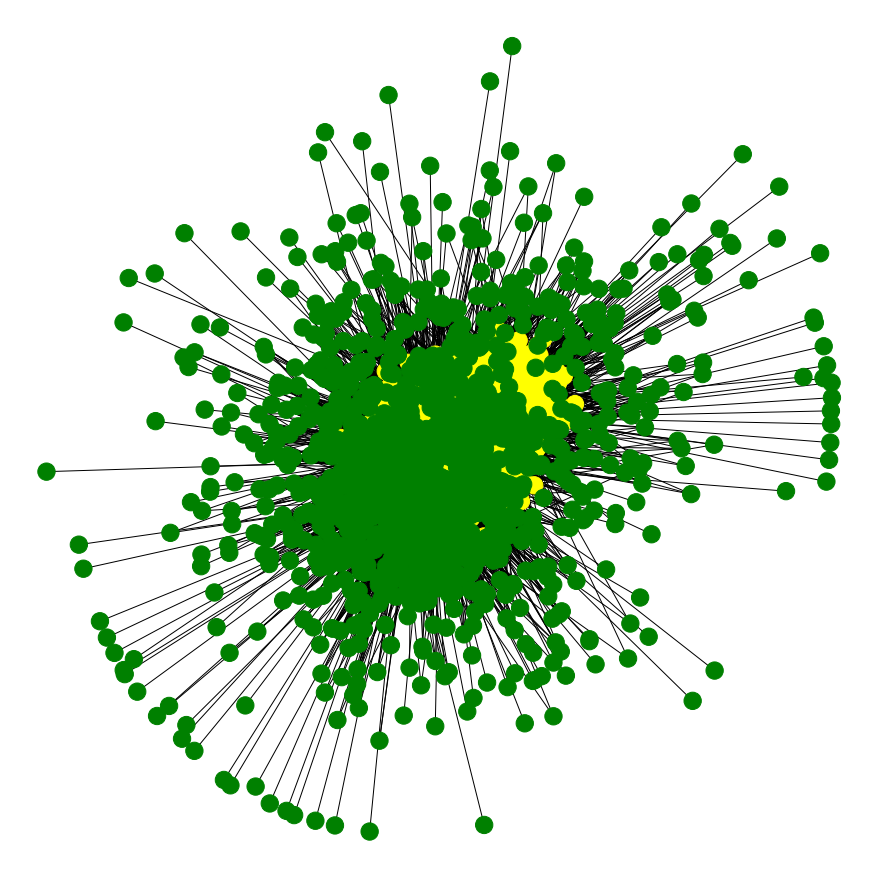

In [9]:
pos = nx.spring_layout(G)
plt.figure(3,figsize=(12,12)) 
nx.draw(G,pos,node_color=color_map)
plt.show()

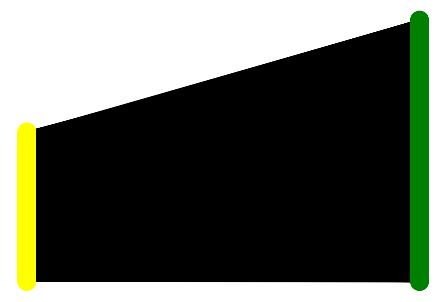

In [11]:
X, Y = nx.bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(G, pos=pos, node_color=color_map)
plt.show()